In [ ]:
import pandas as pd
import pickle

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("drive/MyDrive/dataset/dataset Deep Learning/dataset_heart.csv")

In [ ]:
print(sum(df['output']==1))
print(sum(df['output']==0))

165
138


In [ ]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
df[cat_columns] = df[cat_columns].astype(str)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
list(df)

['age',
 'trtbps',
 'chol',
 'thalachh',
 'oldpeak',
 'sex_1',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_1',
 'restecg_1',
 'restecg_2',
 'exng_1',
 'slp_1',
 'slp_2',
 'caa_1',
 'caa_2',
 'caa_3',
 'caa_4',
 'thall_1',
 'thall_2',
 'thall_3',
 'output_1']

In [ ]:
df.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output_1
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [ ]:
x = df.iloc[:, 0:-1].values

y = df.iloc[:, -1].values

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,random_state= 42)

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(22,)))
model.add(Dropout(0.2)) 
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    verbose=1,
    mode='auto')

In [ ]:
history = model.fit(x_train,y_train,epochs=2000,batch_size=10000,validation_split=0.10,callbacks=cb)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 0.7191 - accuracy: 0.4654 - val_loss: 0.6659 - val_accuracy: 0.7200
Epoch 2/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.7183 - accuracy: 0.4470 - val_loss: 0.6639 - val_accuracy: 0.7200
Epoch 3/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.7133 - accuracy: 0.4608 - val_loss: 0.6619 - val_accuracy: 0.7200
Epoch 4/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.7274 - accuracy: 0.4562 - val_loss: 0.6600 - val_accuracy: 0.7200
Epoch 5/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.7128 - accuracy: 0.4977 - val_loss: 0.6581 - val_accuracy: 0.7200
Epoch 6/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.7042 - accuracy: 0.4931 - val_loss: 0.6563 - val_accuracy: 0.7200
Epoch 7/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.7044 - accuracy: 0.5023 - val_loss: 0.6545 - val_accuracy: 0.7200
Epoch 8/2000
1/

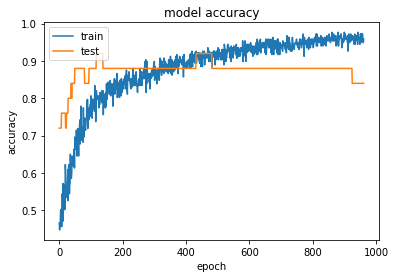

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

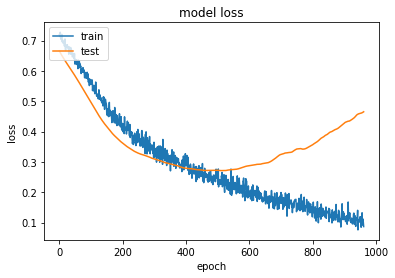

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(x_test)
pred = tf.cast(tf.round(pred), dtype=tf.int32).numpy().reshape(61)

2/2 [==============================] - 0s 8ms/step


In [ ]:
print("True heart attack chances      :", y_test[:15])
print("Predicted heart attack chances :", pred[:15])

True heart attack chances      : [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1]
Predicted heart attack chances : [0 1 1 0 1 1 1 0 0 0 1 0 1 0 1]


In [ ]:
x_test[:1]

array([[ 0.29046364,  1.04952029,  0.57466203, -1.6463164 , -0.37924438,
         0.68100522, -0.44455422, -0.63464776, -0.28660575, -0.41763453,
        -1.00330579, -0.11566299,  1.43548113,  1.07902072, -0.93914194,
         1.91351469, -0.37867694, -0.26584089, -0.12953194,  3.97911213,
        -1.10076284, -0.79311554]])

In [ ]:
acc=accuracy_score(y_test, pred) * 100
print(acc)

85.24590163934425


In [ ]:
print('Classification report:\n', classification_report(y_test, pred))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
model.save("model3.h5")
pickle.dump(model, open('model.pkl','wb'))
print("Saved model to disk")

Saved model to disk
